In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import requests
import pickle

In [3]:
%%bash
cd '/content/drive/My Drive/Colab Notebooks/product-recommendation/name-similarity-model'
ls

API
local
pretrained


In [4]:
pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)

nb_closest_images=5

folderPath='/content/drive/My Drive/Colab Notebooks/product-recommendation/name-similarity-model'
subfolder='API'
modelCSV=os.path.join(subfolder,'model.csv')
idsPickle=os.path.join(subfolder,'ids.pickle')
namesPickle=os.path.join(subfolder,'names.pickle')
namesMapPickle=os.path.join(subfolder,'namesMap.pickle')

In [9]:
model=hub.load(os.path.join(folderPath,'pretrained','universal-sentence-encoder_4'))

In [ ]:
# module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
# model = hub.load(module_url)
# print ("module %s loaded" % module_url)

AttributeError: ignored

In [10]:
def embed(input):
    return model(input)

In [11]:
def plot_similarity(ids,labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
        corr,
        xticklabels=ids,
        yticklabels=ids,
        vmin=0,
        vmax=1,
        cmap="YlOrRd"
    )
    g.set_xticklabels(ids, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

In [12]:
cos_similarities_df=None

def run_and_plot(ids,messages_,plot=True,df=True):
    global cos_similarities_df
    message_embeddings_ = embed(messages_)
    corr = np.inner(message_embeddings_, message_embeddings_)
    cos_similarities_df = pd.DataFrame(corr, columns=ids, index=ids)
    cos_similarities_df.to_csv("trained.csv")
    if plot==True and df==True:
        print(cos_similarities_df)
        plot_similarity(ids,messages_, message_embeddings_, 100)
    elif plot==True:
        plot_similarity(ids,messages_, message_embeddings_, 100)
    elif df==True:
        print(cos_similarities_df)

In [8]:
domain = 'http://832283cda031.ngrok.io'
fileurl = domain + '/api/products/dataset/names/'

ids=list()
names=list()

resp=requests.get(fileurl)
namesMap=resp.json()
print(type(namesMap),len(namesMap))

JSONDecodeError: ignored

In [ ]:
for key,val in namesMap.items():
    # print(val)
    ids.append(key)
    names.append(val)

           82        83        84        85        86        87        88        89        90        91        92        93        94        95        96        97        98        99       100       101       102       103       104       105       106       107       108       109       110       111       112       113       114       115       116       117       118       119       120       121       122       123       124       125       126       127       128       129       130       131       132       133       134       135       136       137       138       139       140       141       142       143       144       145       146       147       148       149       150       151       152       153       154       155       156       157       158       159       160       161       162
82   1.000000  0.590873  0.629770  0.759467  0.648869  0.152980  0.291721  0.292034  0.172438  0.211316  0.279112  0.245285  0.248096  0.231372  0.242423  0.236521  0.284802  0.220278  0

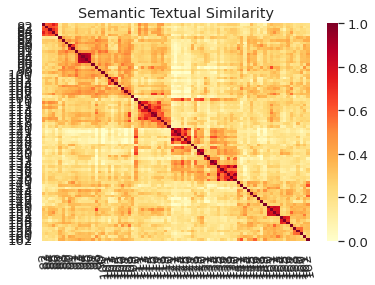

In [ ]:
run_and_plot(ids,names,plot=True,df=True)

In [ ]:
with open(os.path.join(folderPath,idsPickle), 'wb') as f:
    pickle.dump(ids, f)

with open(os.path.join(folderPath,namesPickle), 'wb') as f:
    pickle.dump(names, f)

with open(os.path.join(folderPath,namesMapPickle), 'wb') as f:
    pickle.dump(namesMap, f)

cos_similarities_df.to_csv(os.path.join(folderPath,modelCSV))

In [ ]:
with open(os.path.join(folderPath,idsPickle), 'rb') as f:
    id = pickle.load(f)
print(type(id))

with open(os.path.join(folderPath,namesMapPickle), 'rb') as f:
    nameMap = pickle.load(f)
print(type(nameMap))
    
model=pd.read_csv(os.path.join(folderPath,modelCSV), index_col=[0])
model.head()

<class 'list'>
<class 'dict'>


,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162
82,1.000000,0.590873,0.629770,0.759467,0.648869,0.152980,0.291721,0.292034,0.172438,0.211316,0.279112,0.245285,0.248096,0.231372,0.242423,0.236521,0.284802,0.220278,0.316791,0.140855,0.295045,0.210033,0.238055,0.238658,0.202143,0.231910,0.297318,0.119883,0.269156,0.508011,0.357300,0.429615,0.282413,0.288712,0.262684,0.433192,0.451539,0.225520,0.259764,0.160508,0.169179,0.208761,0.284378,0.178944,0.210949,0.140787,0.238630,0.190038,0.242628,0.191549,0.111316,0.213732,0.162210,0.263146,0.234937,0.252190,0.276257,0.283785,0.284144,0.251315,0.100121,0.105360,0.122366,0.335061,0.219761,0.124879,0.156229,0.073549,0.284763,0.345877,0.304343,0.303560,0.288404,0.218089,0.267062,0.248768,0.187017,0.206800,0.224032,0.210532,0.193103
83,0.590873,1.000000,0.642297,0.619590,0.572747,0.192551,0.308366,0.292659,0.253348,0.184370,0.297955,0.246345,0.219789,0.227174,0.246502,0.297526,0.204039,0.268614,0.291071,0.194783,0.321744,0.318199,0.335195,0.250643,0.277483,0.259972,0.325945,0.150636,0.209611,0.408618,0.236496,0.395613,0.175474,0.214591,0.249569,0.383187,0.253404,0.152379,0.115295,0.094948,0.043063,0.117097,0.190582,0.112724,0.164168,0.158444,0.242412,0.089850,0.130751,0.208816,0.156338,0.212542,0.162177,0.182762,0.143904,0.172303,0.186558,0.184591,0.209735,0.163743,0.140226,0.189678,0.225204,0.226227,0.193130,0.202610,0.127370,0.177819,0.282183,0.248718,0.298838,0.258741,0.284751,0.183757,0.290832,0.261198,0.179996,0.216760,0.273774,0.161719,0.205417
84,0.629770,0.642297,1.000000,0.719170,0.621819,0.177906,0.303692,0.257200,0.237457,0.236484,0.332212,0.273813,0.271622,0.266796,0.294392,0.215345,0.273332,0.257197,0.359921,0.227382,0.332182,0.233178,0.328155,0.244830,0.226993,0.228011,0.387160,0.109431,0.245393,0.507386,0.364560,0.459428,0.302311,0.322337,0.357617,0.459380,0.325207,0.195425,0.261615,0.126701,0.096299,0.175102,0.184266,0.130954,0.149547,0.181471,0.203483,0.133598,0.193800,0.235293,0.185590,0.235874,0.202860,0.283298,0.166246,0.273305,0.251980,0.311152,0.302590,0.244898,0.169665,0.147391,0.175261,0.290866,0.245419,0.094129,0.218182,0.171660,0.330789,0.351697,0.389186,0.381888,0.182157,0.079066,0.254629,0.309453,0.219795,0.185412,0.240605,0.224302,0.183180
85,0.759467,0.619590,0.719170,1.000000,0.604299,0.165064,0.322550,0.269580,0.276847,0.266218,0.342883,0.273481,0.281112,0.242865,0.312607,0.225840,0.331877,0.234068,0.414292,0.211633,0.264813,0.230901,0.259092,0.262474,0.265441,0.271934,0.512609,0.180846,0.249739,0.483131,0.312884,0.411094,0.230042,0.408294,0.414483,0.431071,0.312247,0.171971,0.219214,0.161177,0.185434,0.214400,0.212820,0.170299,0.149061,0.142399,0.225032,0.191077,0.270510,0.196094,0.158695,0.209332,0.172719,0.281446,0.193719,0.208624,0.272679,0.294600,0.293228,0.250312,0.197532,0.114065,0.152361,0.281851,0.223405,0.135764,0.243810,0.111006,0.309748,0.366384,0.479436,0.335332,0.265736,0.193452,0.286994,0.422097,0.223815,0.260032,0.231554,0.248598,0.202005
86,0.648869,0.572747,0.621819,0.604299,1.000000,0.144005,0.258502,0.278068,0.221759,0.248193,0.283061,0.287021,0.257424,0.284851,0.290885,0.281218,0.269849,0.271381,0.360401,0.192441,0.418845,0.359918,0.356329,0.254017,0.292162,0.346495,0.319981,0.180569,0.166953,0.421687,0.322682,0.377503,0.258614,0.255888,0.243168,0.446815,0.382692,0.274166,0.322496,0.029202,0.063915,0.095434,0.211193,0.046965,0.124343,0.195580,0.168710,0.087481,0.167919,0.189064,0.178474,0.151652,0.113228,0.228534,0.143857,0.247896,0.244869,0.209709,0.280205,0.219137,0.169837,0.149216,0.201112,0.307679,0.181514,0.175841,0.160039,0.211100,0.262755,0.341241,0.298481,0.277235,0.271158,0.164088,0.322437,0.279837,0.139724,0.232206,0.243860,0.182799,0.147587


In [ ]:
def retrieve_most_similar_products(given_id):
    print("-----------------------------------------------------------------------")
    print("original product:")
    print(nameMap[given_id])
    print("-----------------------------------------------------------------------")
    print("most similar products:")
    closest_name = model[given_id].sort_values(ascending=False)[1:].index
    closest_name_scores = model[given_id].sort_values(ascending=False)[1:]
    # print(closest_imgs)
    # print(closest_imgs_scores)

    for i in range(0,nb_closest_images):
        print("id : ",closest_name[i])
        print("product : ",nameMap[str(closest_name[i])])
        print("similarity score : ",closest_name_scores[(closest_name[i])])

In [ ]:
retrieve_most_similar_products("163")

-----------------------------------------------------------------------
original product:
Apple Golden Delicious
-----------------------------------------------------------------------
most similar products:
id :  166
product :  Apple Red Delicious
similarity score :  0.75946736
id :  167
product :  Apple Royal Gala
similarity score :  0.6488691999999999
id :  165
product :  Apple Pink Lady
similarity score :  0.6297704000000001
id :  164
product :  Apple Granny Smith
similarity score :  0.5908729
id :  192
product :  Bravo Apple Juice
similarity score :  0.5080110999999999


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%bash
cd '/content/drive/My Drive/Colab Notebooks/product-recommendation/name-similarity-model'
wget -c "https://storage.googleapis.com/tfhub-modules/google/universal-sentence-encoder-large/5.tar.gz" -O - | tar -xz

--2020-11-26 16:21:42--  https://storage.googleapis.com/tfhub-modules/google/universal-sentence-encoder-large/5.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 548921135 (523M) [application/x-tar]
Saving to: ‘STDOUT’

     0K .......... .......... .......... .......... ..........  0% 67.0M 8s
    50K .......... .......... .......... .......... ..........  0% 72.7M 8s
   100K .......... .......... .......... .......... ..........  0% 26.3M 12s
   150K .......... .......... .......... .......... ..........  0% 13.4M 18s
   200K .......... .......... .......... .......... ..........  0% 4.19M 40s
   250K .......... .......... .......... .......... ..........  0% 37.8M 35s
   300K .......... .......... .......... .......... ..........  0% 21.6M 34s
   350K ..........

# AIO Section

Dataframe head()-->
          1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66        67        68        69        70        71        72        73        74        75        76        77        78        79        80        81
1  1.000000  0.519733  0.489429  0.523235  0.405883  0.415644  0.529781  0.507637  0.366378  0.419307  0.506781  0.340572  0.452574  0.287645  0.391771  0.535068  0.380

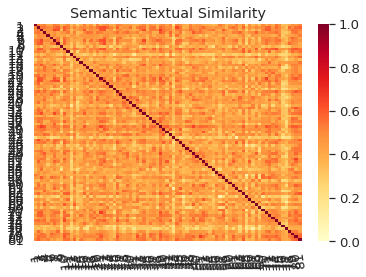

In [2]:
from absl import logging
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import csv
import pickle
import tensorflow_hub as hub
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import requests
import pickle

def embed(input):
    return model(input)

def plot_similarity(ids,labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
        corr,
        xticklabels=ids,
        yticklabels=ids,
        vmin=0,
        vmax=1,
        cmap="YlOrRd"
    )
    g.set_xticklabels(ids, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

def run_and_plot(ids,messages_,plot=True,df=True):
    global cos_similarities_df
    message_embeddings_ = embed(messages_)
    corr = np.inner(message_embeddings_, message_embeddings_)
    cos_similarities_df = pd.DataFrame(corr, columns=ids, index=ids)
    cos_similarities_df.to_csv("trained.csv")
    if plot==True and df==True:
        print("Dataframe head()-->")
        print(cos_similarities_df.head())
        print("Graph-->")
        plot_similarity(ids,messages_, message_embeddings_, 100)
    elif plot==True:
        plot_similarity(ids,messages_, message_embeddings_, 100)
    elif df==True:
        print(cos_similarities_df.head())

def retrieve_most_similar_products(given_id):
    print("-----------------------------------------------------------------------")
    print("original product:")
    print(namesMap[given_id])
    print("-----------------------------------------------------------------------")
    print("most similar products:")
    closest_name = cos_similarities_df[given_id].sort_values(ascending=False)[1:].index
    closest_name_scores = cos_similarities_df[given_id].sort_values(ascending=False)[1:]
    # print(closest_imgs)
    # print(closest_imgs_scores)

    for i in range(0,nb_closest_images):
        print("id : ",closest_name[i])
        print("product : ",namesMap[str(closest_name[i])])
        print("similarity score : ",closest_name_scores[(closest_name[i])])

pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

nb_closest_images=3

# folderPath='/content/drive/My Drive/Colab Notebooks/product-recommendation/name-similarity-model'
# model=hub.load(os.path.join(folderPath,'pretrained','universal-sentence-encoder_5'))
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

cos_similarities_df=None

ids=list()
names=list()
namesMap=dict()

products = csv.DictReader(open("productsDf.csv"))
for row in products:
    namesMap[row["id"]]=row["name"]
    ids.append(row["id"])
    names.append(row["name"])

run_and_plot(ids,names,plot=True,df=True)

In [6]:
retrieve_most_similar_products("21")
# 60  2  6  9  17  18   20

-----------------------------------------------------------------------
original product:
Fruits-Peach
-----------------------------------------------------------------------
most similar products:
id :  29
product :  Packages-Arla-Sour-Milk
similarity score :  0.5878886
id :  2
product :  Fruits-Apple-Granny-Smith
similarity score :  0.5643285
id :  28
product :  Fruits-Satsumas
similarity score :  0.55599606
